# Function Fitting

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()

## load data

In [2]:
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

Training data set: (300, 22832)


In [3]:
## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data

## make folder for each function

In [ ]:
dcp.make_folders("Figs/curve_fitting/")

## exponential fit

### Two parameters

#### train on 15 attempts

In [ ]:
dcp.make_folders("Figs/curve_fitting/exponential2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "Figs/curve_fitting/exponential2/{0}".format(i+1), clt_num = i+1)
    ## validation
    y_fit = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    
    exp2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/exponential2/valid{0}".format(i), 
              clt_num=i+1, cost = exp2_cost300)

### Three parameters

#### train on 15 attempts

In [ ]:
dcp.make_folders("Figs/curve_fitting/exponential3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/exponential3/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    exp3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    cost300 = cv.cost_Function(attempts300, y_fit)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/exponential3/valid{0}".format(i), 
              clt_num=i+1, cost = exp3_cost300)

### polynoimial fit

In [ ]:
dcp.make_folders("Figs/curve_fitting/polynomial2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    poly_opt, poly_cost = cv.curve_Fitting(
        cv.polynomial_least, cv.polynomial_curve, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/polynomial2/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.polynomial_curve(attempts300, poly_opt[0], poly_opt[1])
    
    poly_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/polynomial2/valid{0}".format(i), 
              clt_num=i+1, cost = poly_cost300)

### power law fit

#### Two parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw2/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve2(attempts300, pl2_opt[0], pl2_opt[1])
    pl2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw2/valid{0}".format(i), 
              clt_num=i+1, cost = pl2_cost300)

#### Thress parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl3_opt, pl3_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw3/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve3(attempts300, pl3_opt[0], pl3_opt[1], pl3_opt[2])
    pl3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw3/valid{0}".format(i), 
              clt_num=i+1, cost = pl3_cost300)

#### Four parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw4")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl4_opt, pl4_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw4/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve4(attempts300, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3])
    pl4_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="Figs/curve_fitting/powerlaw4/valid{0}".format(i), 
              clt_num=i+1, cost = pl4_cost300)

## Multiple curves

### exponential with three parameter

In [ ]:
seed = [1, 1, 1]
m_exp3_idx1, m_exp3_idx2, m_exp3_cost = cv.multi_curveFitting_3(cv.exponential_least3, avg11, seed, n_param=3)

In [ ]:
seed = [1, 1, 1, 1]
m_pl4_idx1, m_pl4_idx2, m_pl4_cost = cv.multi_curveFitting_3(cv.powerlaw_least4, avg11, seed, n_param=4)

In [ ]:
y_mean1 = cv.exponential_curve3(attempts300, p1[0], p1[1], p1[2])
y_mean2 = cv.exponential_curve3(attempts300, p2[0], p2[1], p2[2])
y_mean3 = cv.exponential_curve3(attempts300, p3[0], p3[1], p3[2])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(attempts300, avg11, 'rx', label='average score')
ax.plot(attempts300[:idx1], y_mean1[:idx1], 'b-', label='curve 1', linewidth=3)
ax.plot(attempts300[idx1:idx1+idx2], y_mean2[idx1:idx1+idx2], 'g-', label='curve 2', linewidth=3)
ax.plot(attempts300[idx1+idx2:], y_mean3[idx1+idx2:], 'c-', label='curve 3', linewidth=3)

ax.set_ylim([0, max(avg11)+0.2])
ax.legend(fontsize=14)
#ax.set_title("cluster {0}: cost {1}".format(clt_num+1, round(cost, 2)))

plt.show()

print(idx1, idx2)

In [37]:
def multi_curveFitting_3(least_func, avg, seed, n_curve=2):
    cost = []
    break_point2 = []
    #idx_mid2 = [] # save idx2(second change)
    
    x_range = np.linspace(1, 300, 300)
    min_range = 20 # minimum x_range
    
    end1 = 0
    end2 = 0

    first_idx = []
    for n in range(int(300/min_range) - 2): # iteration for all data
        print("\n - iter{0}".format(n))
        x_idx = 0
        if x_idx == 0:
            end1 = min_range*(n+1) # caculate the first range limit
            x1 = x_range[:end1]
            y1 = avg[:end1]
            lsq1 = least_squares(least_func, seed, args=(x1, y1))
            #print('x1', x1)
            first_idx.append(end1)
        
        second_idx = []
        second_cost = []
        for j in range(int( (300-(min_range*(n+2))) / min_range) ): # iteration for 2nd and 3rd x_range
            print("iter {0}-{1}".format(n, j))
            end2 = min_range*(j+1) + end1 # caculate the second range limit
            x2 = x_range[end1:end2]
            y2 = avg[end1:end2]
            lsq2 = least_squares(least_func, seed, args=(x2, y2))
            #print('x2', x2)
            
            x3 = x_range[end2:]
            y3 = avg[end2:]
            lsq3 = least_squares(least_func, seed, args=(x3, y3))
            #print('x3', x3)

            second_idx.append(end2) # save 2nd break points
            second_cost.append(lsq1.cost + lsq2.cost + lsq3.cost) # save costs
        
        break_point2.append(second_idx[np.argmin(second_cost)]) # get index where cost of remained x_ranges is minimum
        cost.append(second_cost) # save costs
        
    point1 = np.argmin(cost) # get array index of cost is minimum
    point2 = break_point2[point1] # get index of 2nd break point
            
    return min_range*(point1+1), point2

seed = [1, 1, 1, 1]
p1, p2 = multi_curveFitting_3(cv.powerlaw_least3, avg2, seed, n_curve=3)

print(p1, p2)


 - iter0
iter 0-0
iter 0-1
iter 0-2
iter 0-3
iter 0-4
iter 0-5
iter 0-6
iter 0-7
iter 0-8
iter 0-9
iter 0-10
iter 0-11
iter 0-12

 - iter1
iter 1-0
iter 1-1
iter 1-2
iter 1-3
iter 1-4
iter 1-5
iter 1-6
iter 1-7
iter 1-8
iter 1-9
iter 1-10
iter 1-11

 - iter2
iter 2-0
iter 2-1
iter 2-2
iter 2-3
iter 2-4
iter 2-5
iter 2-6
iter 2-7
iter 2-8
iter 2-9
iter 2-10

 - iter3
iter 3-0
iter 3-1
iter 3-2
iter 3-3
iter 3-4
iter 3-5
iter 3-6
iter 3-7
iter 3-8
iter 3-9

 - iter4
iter 4-0
iter 4-1
iter 4-2
iter 4-3
iter 4-4
iter 4-5
iter 4-6
iter 4-7
iter 4-8

 - iter5
iter 5-0
iter 5-1
iter 5-2
iter 5-3
iter 5-4
iter 5-5
iter 5-6
iter 5-7

 - iter6
iter 6-0
iter 6-1
iter 6-2
iter 6-3
iter 6-4
iter 6-5
iter 6-6

 - iter7
iter 7-0
iter 7-1
iter 7-2
iter 7-3
iter 7-4
iter 7-5

 - iter8
iter 8-0
iter 8-1
iter 8-2
iter 8-3
iter 8-4

 - iter9
iter 9-0
iter 9-1
iter 9-2
iter 9-3

 - iter10
iter 10-0
iter 10-1
iter 10-2

 - iter11
iter 11-0
iter 11-1

 - iter12
iter 12-0
200 220


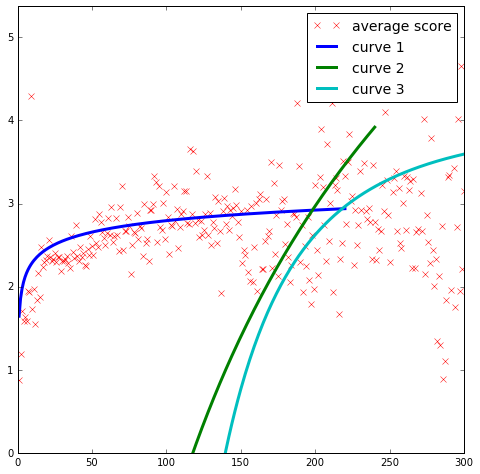

In [38]:
x_range = np.linspace(1, 300, 300)
x1 = x_range[:p1]
x2 = x_range[p1:p2]
x3 = x_range[p2:]

true_y1 = avg2[:p1]
true_y2 = avg2[p1:p2]
true_y3 = avg2[p2:]

lsq1 = least_squares(cv.powerlaw_least3, seed, args=(x1, true_y1))
lsq2 = least_squares(cv.powerlaw_least3, seed, args=(x2, true_y2))
lsq3 = least_squares(cv.powerlaw_least3, seed, args=(x3, true_y3))

'''
pred_y1 = cv.powerlaw_curve4(attempts300, lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
pred_y2 = cv.powerlaw_curve4(attempts300, lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq1.x[3])
pred_y3 = cv.powerlaw_curve4(attempts300, lsq3.x[0], lsq3.x[1], lsq3.x[2], lsq1.x[3])
'''
pred_y1 = cv.powerlaw_curve3(x_range[:p1+20], lsq1.x[0], lsq1.x[1], lsq1.x[2])
pred_y2 = cv.powerlaw_curve3(x_range[:p2+20], lsq2.x[0], lsq2.x[1], lsq2.x[2])
pred_y3 = cv.powerlaw_curve3(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(attempts300, avg11, 'rx', label='average score')
ax.plot(x_range[:p1+20], pred_y1, 'b-', label='curve 1', linewidth=3)
ax.plot(x_range[:p2+20], pred_y2, 'g-', label='curve 2', linewidth=3)
ax.plot(x_range, pred_y3, 'c-', label='curve 3', linewidth=3)

ax.set_ylim([0, max(avg11)+0.2])
ax.legend(fontsize=14)
#ax.set_title("cluster {0}: cost {1}".format(clt_num+1, round(cost, 2)))

plt.show()